## Resumo Aula 2 ML3 ##

## Técnicas de Seleção de Atributos

- *Filtering*
- *Embedding* - modelos lineares
- *Embedding* - models baseados em árvores

De acordo com o artigo do [Medium](https://medium.com/@mxcsyounes/hands-on-with-feature-selection-techniques-an-introduction-1d8dc6d86c16) - na verdade é uma série bem interessante de artigos, selecionar atributos se trata de uma atividade crucial na etapa de modelagem, visto que com o advento do BigData, temos cada vez mais acesso a dados altamente dimensionais. No entanto, muitas dessas dimensões podem ser ruidosas ou então inúteis para o propósito de modelagem.

O processo de **seleção de atributos** consiste na escolha, com base em algum critério quantitativo, de um **subconjunto** de atributos, menor que o conjunto original, de forma que o modelo treinado com esse subconjunto proporcione um desempenho comparável ao modelo treinado com todas os atributos.

<img src=https://miro.medium.com/max/694/0*D_jQ5yBsvCZjEYIW width=400>

Apesar de ser possível (e recomendado) aplicar o conhecimento de negócios para selecionar atributos, muitas vezes são necessárias técnicas mais automatizadas para selecionar os atributos.

## **1. Técnicas de Filtro**

São as técnicas de seleção de atributos que independem de modelos e cuja tomada de decisão funciona basicamente considerando-se as características dos atributos. Os atributos são filtrados antes do processo de aprendizado se iniciar.

### **1.1. Vantagens**

- podem ser utilizados por qualquer algoritmo / modelo
- não são custosos computacionalmente
- excelentes para detectar e eliminar atributos com problemas básicos de qualidade
    - irrelevantes
    - redundantes
    - constantes
    - duplicações
    - correlacionados

### **1.2. Desvantagens**

- Por serem independentes do algoritmo utilizado, tendem a ignorar o efeito dos atributos sobre o desempenho dos modelos
- Além disso, realiza a seleção de atributos de forma individual, de forma que não consegue avaliar o efeito de combinação de atributos - muitas vezes conhecido como "efeitos de interação".

### **1.3. Subdivisões**

Os métodos de filtro podem ainda ser subdivididos em dois tipos:

- **univariados** - quando levam consideração apenas as estatísticas de uma única variável, como por exemplo, exclusão de colunas por variância nula.
- **multivariados** - quando considera a interação entre a variável preditora e a variável alvo, como por exemplo, excluir variáveis que possuem baixa correlação com a variável alvo.

Os métodos de filtro são técnicas de seleção que podem ser supervisionadas ou não, ou seja, podem depender da presençada variável alvo ou não. Além disso, a técnica de selação vai depender do tipo de variável dependente e independente.

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" text='machinelearningmastery.com/feature-selection-with-real-and-categorical-data/' width=600px>

Essencialmente, os atributos são ranqueados de acordo com a técnica estatística aplicada e, geralmente, escolhem-se os top $k$ atributos, onde $k$ é um hiperparâmetro modificável.

[Link da Documentação de Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)

Segue alguns exemplos de aplicação de métodos de filtros.

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2, SelectFromModel, f_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, recall_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# ignorar warnings
warnings.filterwarnings('ignore')

In [3]:
# carregar dados
data_reg = pd.read_csv('../datasets/garments_worker_productivity.csv')
data_reg.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
# verificando tipos e dados nulos
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# selecionando apenas features numéricas
data_reg = data_reg.select_dtypes(include=np.number)
data_reg.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
# analisando-se a variância
data_reg.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [7]:
# extraindo features
x = data_reg.drop(['actual_productivity'], axis=1)

In [8]:
np.shape(x)

(1197, 10)

In [9]:
# filtrando-se pelo limite de variância
selector = VarianceThreshold(threshold=0.1)
selector.fit(x)

VarianceThreshold(threshold=0.1)

In [10]:
# selecionando os atributos
x = x.loc[:, list(selector.get_support())]
x.head()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0
1,1,3.94,NaN,960,0,0.0,0,0,8.0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5
3,12,11.41,968.0,3660,50,0.0,0,0,30.5
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0


In [11]:
np.shape(x)

(1197, 9)

In [12]:
# analisando-se a correlação das features com o target
data = x.copy()
data['target'] = data_reg['actual_productivity']

# correlação
data_corr = pd.DataFrame(abs(data.corr(method='spearman')['target']).values,
                         columns=['r'], index = data.corr(method='spearman').index)

# selecionando as features
selec_features = data_corr.loc[data_corr.r > 0.15, 'r'].index.values
selec_features = [col for col in selec_features if col != 'target']
selec_features

['team', 'wip', 'incentive', 'no_of_style_change']

In [13]:
# selecionando os atributos pela correlação
x = x.loc[:, list(selec_features)]
x.head()

,team,wip,incentive,no_of_style_change
0,8,1108.0,98,0
1,1,NaN,0,0
2,11,968.0,50,0
3,12,968.0,50,0
4,6,1170.0,50,0


### ***Teste do $\chi^2$ - Selecionar Atributos Categóricos***

Para atributos numéricos, podemos utilizar a correlação de Pearson ou Spearman para aplicar algoritmos de seleção de atributos. No entanto, a correlação pode não fazer sentido quando tratamos de variáveis de caráter categórico. Assim sendo, podemos utilizar outros testes estatísticos para determinar se existe relação entre variáveis categóricas.

O teste é baseado na comparação da contagem cruzada de duas variáveis categóricas - conhecido com o tabela de contingências. A estatística de teste é calculada pela soma:

$$\chi^2_{calc} = \sum_{i=1}^n \frac{(O_i - E_i)^2}{E_i}$$

Onde: $O_i$ é a frequência observada e $E_i$ é a frequência esperada para determinada categoria dentro da população amostrada. Se as frequências observadas forem muito diferentes das frequências esperadas, então isso pode ser um indício de que as variáveis categóricas estejam correlacionadas entre si. A decisão de significância estatística é feita com base na comparação da estatística calculada com o valor esperado proveniente de uma distribuição do $\chi^2$, assumindo-se a hipótese nula sendo verdadeira - muito semelhante ao que é realizado para os testes de hipóteses que aprendemos em estatística.

Assim sendo, podemos usar esse teste estatístico para poder selecionar atributos categóricos que possuam relação com uma variável alvo também categórica.

In [14]:
# carregar dados de classificação
data_classif = pd.read_csv('../datasets/german_credit_data.csv')
data_classif.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [15]:
# selecionando apenas variáveis categóricas
data_classif = data_classif.select_dtypes(exclude=np.number)
data_classif.head()

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,NaN,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,NaN,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad


In [16]:
# separando predtitores e preditos
x = data_classif.drop(['Risk'], axis=1)
y = data_classif[['Risk']]

# preenchendo os valores ausentes
x = x.fillna('None')

# codificando variáveis categóricas
cod = OrdinalEncoder().fit(x)

In [17]:
# transformando
x_cod = pd.DataFrame(cod.transform(x), columns=x.columns)
y_cod = y['Risk'].map({'good': 0, 'bad': 1})

In [18]:
# selecionando os mais relacionados
selector = SelectKBest(chi2, k=2).fit(x_cod, y_cod)

# mostrando top 2 correlacionados
x_cod.loc[:, selector.get_support()]

,Checking account,Purpose
0,1.0,5.0
1,2.0,5.0
2,0.0,3.0
3,1.0,4.0
4,1.0,1.0
...,...,...
995,0.0,4.0
996,1.0,1.0
997,0.0,5.0
998,1.0,5.0


<hr>

**Exercício 1.** Usando o método `SelectKBest` e o dataset `heart.csv`, realize experimentações com diferentes números de atributos para determinar qual a melhor quantidade de atributos a serem utilizadas para classificar a chance de uma pessoa ter ataque cardíaco. Compare o desempenho de um modelo de Regressão Logística e um modelo de Random Forest. *Dica:* por se tratar de um modelo de classificação, use a função `f_classif` dentro do método SelectKBest.

In [19]:
# Leitura do dataset
data_heart = pd.read_csv('../datasets/heart.csv')

In [20]:
# verificando dados nulos e tipo dos dados
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
# Verificando a estatistica dos dados
data_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [22]:
# Separando features, dados categoricos, numericos e target
x = data_heart.drop(columns='HeartDisease')
y = data_heart['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [23]:
# configurando pipeline de pre processamento

cat_features = x.select_dtypes(exclude=np.number).columns.to_list()

cat_transform = Pipeline([('encoder', OrdinalEncoder())])

preprocessing = ColumnTransformer([('encoder', cat_transform, cat_features )])

In [24]:
# configurando pipeline final de regressao logistica
pipe_final_rl = Pipeline([('preprocessing', preprocessing),
                          ('scaler', StandardScaler()),
                          ('feature_selection', SelectKBest(score_func=f_classif)),
                          ('modelo', LogisticRegression(penalty='elasticnet', l1_ratio=0.1, solver='saga',random_state=42))])

In [25]:
# configurando o search
kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dict = {'feature_selection__k':[1,2,3,4,5,6,7,8,9,10]}

metric = {'recall': make_scorer(recall_score, pos_label = 1)}

search = GridSearchCV(estimator=pipe_final_rl, param_grid=param_dict, scoring=metric, cv=kf5, refit='recall', n_jobs=-1)

In [26]:
search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('scaler', StandardScaler()),
                                       ('feature_selection'

# Avaliando o modelo de Regressao logistica

In [27]:
search.best_params_

{'feature_selection__k': 2}

In [28]:
search.best_score_

0.8732394366197184

In [29]:
y_predict = search.best_estimator_.predict(x_test)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       123
           1       0.83      0.82      0.82       153

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



In [31]:
y_train_predict = search.predict(x_train)

In [32]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       287
           1       0.82      0.86      0.84       355

    accuracy                           0.82       642
   macro avg       0.82      0.81      0.81       642
weighted avg       0.82      0.82      0.82       642



In [33]:
# configurando pipeline final de RandomForest 
pipe_final_rf = Pipeline([('preprocessing', preprocessing),
                          ('scaler', StandardScaler()),
                          ('feature_selection', SelectKBest(score_func=f_classif)),
                          ('modelo', RandomForestClassifier())])

In [34]:
# configurando o search
kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dict_rf = {'feature_selection__k':[1,2,3,4,5,6,7,8,9,10],
                 'modelo__n_estimators':[20,50,100],
                 'modelo__max_depth':[5,10,20],
                 'modelo__min_samples_split': [10,20,50,100]}

metric = {'recall': make_scorer(recall_score, pos_label = 1)}

search = GridSearchCV(estimator=pipe_final_rf, param_grid=param_dict_rf, scoring=metric, cv=kf5, refit='recall', n_jobs=-1)

In [35]:
search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('scaler', StandardScaler()),
                                       ('feature_selection'

# Avaliando o modelo de Random Forest

In [36]:
search.best_params_

{'feature_selection__k': 3,
 'modelo__max_depth': 20,
 'modelo__min_samples_split': 100,
 'modelo__n_estimators': 20}

In [37]:
search.best_score_

0.923943661971831

In [38]:
y_predict = search.best_estimator_.predict(x_test)

In [39]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       123
           1       0.83      0.88      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



## **2. Técnicas Embutidas** (***Embedding***)

Como o próprio nome diz, os métodos embutidos ou *embedded* são aqueles que a seleção de atributos é incluída no treinamento do modelo de Machine Learning. Isso permite que o próprio algoritmo de aprendizagem selecione seus próprios atributos mais importantes, **durante** o treinamento do modelo, ao contrário de testar os atributos individualmente ou de testar combinações previamente selecionadas dos atributos.

### **2.1. Vantagens**

- podem levar em consideração interações entre as variáveis
- são rápidos como os métodos de filtro, e são mais acurados
- menor tendência a *overfitting*

### **2.2. Desvantagens**

- o conjunto de atributos depende do modelo aplicado

### **2.3. Técnicas Embutidas para Modelos Lineares - Regularização LASSO**

A regularização LASSO é uma técnica de regularização dos modelos lineares que serve como seletora de atributos, visto que a forma da penalização aplicada à função de custo força os coeficientes dos atributos menos importantes a serem zero. Relembrando a forma da regularização LASSO:

$$LOSS_{LASSO} = MSE + \frac{1}{C} \sum_{i=1}^k |\beta_{k}|$$

Onde: $C$ é o coeficiente que regula a força da regularização; $\beta_k$ são os coeficientes da equação linear

<img src=https://ugc.futurelearn.com/uploads/assets/2b/fe/2bfe399e-503e-4eae-9138-a3d7da738713.png width=800>

Embora ambas as modalidades de regularização tenham sido introduzidas com o intuito de simplificar o espaço de hipóteses, o LASSO faz isso de maneira explícita, efetivamente possibilitando a realização de feature selection!

No entanto, há um problema: são poucos os métodos que têm o LASSO incorporado (ex.: regressão linear, logística, XGBoost).

Assim, se quisermos realizar feature selection utilizando outros estimadores, precisamos de técnicas mais genéricas.

Para utilizarmos o L1, uma abordagem possível é:

- **treinar inicialmente um modelo com LASSO**; 
- identificar quais features **ainda estão presentes no modelo** (isto é, com `coef_` não nulo);
- utilizar apenas estas features para treinar o estimador desejado.

Segue um exemplo:

In [40]:
# carregando os dados utilizados
data = pd.read_csv('../datasets/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
data.drop(columns='Unnamed: 32', inplace=True)
# extraindo features
x = data.drop(['id', 'diagnosis'], axis=1)
y = data[['diagnosis']]

# transformando feature de y
y.diagnosis = y.diagnosis.map({'M': 1, 'B': 0})

In [42]:
# separando em conjunto de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=19, stratify=y)

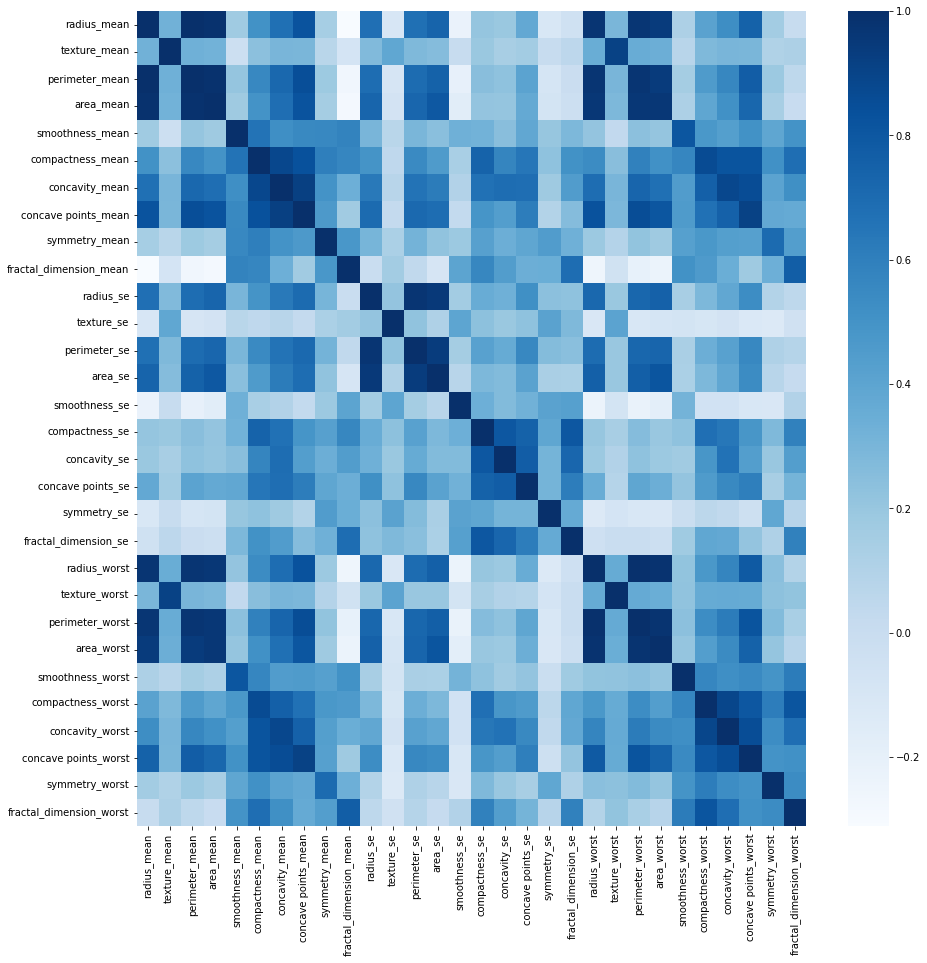

In [43]:
# analisando-se correlação de atriubutos
plt.figure(figsize=(15, 15))
sns.heatmap(x.corr(), cmap='Blues')
plt.show()

OBS: Temos muitas variáveis independentes correlacionadas e já sabemos que isso impacta no nosso modelo de regressão linear. Lasso escolhe aleatóriamente uma das variáveis multicolineares e zera as demais. Isso pode impactar na interpretabilidade do nosso modelo.

In [44]:
# aplicar o escalonamento dos dados
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [45]:
# aplicando a seleção dos atributos via Lasso
selector = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='saga'))

# ajuste do seletor
selector.fit(x_train_sc, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.01, penalty='l1',
                                             solver='saga'))

In [46]:
# realizando seleção de atributos usando validação cruzada - modelo base
model_base_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# dicionário de parâmetros base
param_base = {
    'model__n_estimators': [50, 100, 500, 1000]
}

# objeto de validação cruzada
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=19)

# objeto de busca
search_base = RandomizedSearchCV(
    estimator=model_base_pipe,
    param_distributions=param_base,
    cv=cvs,
    refit=True,
    n_iter=100,
    scoring='f1',
    n_jobs=-1
)

# ajuste
search_base.fit(x_train, y_train.values.ravel())

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__n_estimators': [50, 100, 500,
                                                                1000]},
                   scoring='f1')

In [47]:
# avaliando o desempenho médio
print(search_base.best_score_)

0.9547006645560595


In [48]:
# melhor modelo
print(search_base.best_params_)

{'model__n_estimators': 50}


In [49]:
# predições na base de test
yhat = search_base.best_estimator_.predict(x_test)

# avaliação de desempenho
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       107
           1       0.92      0.92      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [50]:
# realizando seleção de atributos usando validação cruzada - modelo com seleção de atributos
model_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feat_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='saga', max_iter=2000))),
    ('model', RandomForestClassifier(random_state=42))
])

# dicionário de parâmetros base
param = {
    'model__n_estimators': [10,20,50, 100, 500, 1000],
    'feat_selection__estimator__C': np.random.uniform(0.001, 1, 1000),
    'feat_selection__threshold': np.random.uniform(1e-6, 1e-4, 1000)
}

# objeto de busca
search = RandomizedSearchCV(
    estimator=model_pipe,
    param_distributions=param,
    cv=cvs,
    refit=True,
    n_iter=50,
    scoring='f1',
    n_jobs=-1
)

# ajuste
search.fit(x_train, y_train.values.ravel())

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('feat_selection',
                                              SelectFromModel(estimator=LogisticRegression(max_iter=2000,
                                                                                           penalty='l1',
                                                                                           solver='saga'))),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'feat_selection_...
       4.35452515e-05, 6.62810472e-05, 7.86585891e-05, 7.47437834e-06,
       6.50600356e-05, 6.35714904e-05, 3.13230283e-05, 7.78858457e-05,
       8.34962819e-05, 7.78211372e-05, 2.21386474e-06, 4.30668412e-05,

In [51]:
# avaliando o desempenho médio
print(search.best_score_)

0.9613821625167566


In [52]:
# melhor modelo
print(search.best_params_)

{'model__n_estimators': 500, 'feat_selection__threshold': 4.815337746874519e-05, 'feat_selection__estimator__C': 0.39098040133751005}


In [53]:
# atributos escolhidos
x_train.loc[:, search.best_estimator_['feat_selection'].get_support()].head(1)

,radius_mean,concave points_mean,radius_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,symmetry_worst
138,14.95,0.08624,1.296,0.002887,18.55,21.43,121.4,0.1411,0.3355,0.3414


In [54]:
# predições na base de test
yhat = search.best_estimator_.predict(x_test)

# avaliação de desempenho
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.91      0.94      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



### **2.4. Técnicas Embutidas para Árvores - Importância de Atributos**

Além de estimadores poderosos, podemos utilizar modelos baseados em árvores para fazer feature selection! 

Há duas formas comuns de utilizarmos árvores para a determinação da importância de features.

#### `.feature_importances_`

Neste caso, o score de importância de cada uma das features é calculado com base na **média e desvio padrão da diminuição de impureza que cada feature proporciona na árvore (ou em cada árvore, no caso de ensembles)**.

O método é conhecido como **mean decrease in impurity** (MDI).

Este método é rápido, no entanto, o valor é fortemente enviesado para features que têm alta cardinalidade (features numéricas, ou features categóricas com muitos níveis). Isso acontece devido ao fato de que o MDI é calculado testando-se pontos de separação de valores para os atributos. Se um atributo tem alta cardinalidade ou infinitos valores, ele possui mais possíveis pontos de separação, de forma que essa variável vai aparecer probabilisticamente mais vezes como nós de separação. Isso faz com que a árvore apresente baixa capacidade de generalização, pois ela tentará construir relações "um-para-um" com os dados. Se um atributo aparece mais vezes nos dados, então ele é considerado bem importante para o modelo, mesmo quando isso não acontece.

Neste caso, é melhor utilizar o método de permutation feature importance. Para uma comparação detalhada entre os dois métodos, [veja esta página](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py).

In [55]:
# instancia e faz o fit do RF
rf = RandomForestClassifier(n_estimators=50,
                            random_state=42).fit(x_train, y_train)

In [56]:
# Calcula a média para cada feature
np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)

array([0.04447973, 0.00884301, 0.05308247, 0.0412535 , 0.00575277,
       0.01845692, 0.10497342, 0.12483479, 0.00714942, 0.00266497,
       0.02712128, 0.0041704 , 0.01674622, 0.06312868, 0.00172078,
       0.0022323 , 0.00430088, 0.00488527, 0.00479405, 0.00495794,
       0.07636206, 0.01502076, 0.07206428, 0.09415549, 0.00438036,
       0.01479666, 0.06824693, 0.09958055, 0.00751888, 0.0023252 ])

In [57]:
# Calcula o desvio padrão para cada feature
std_fis_rf = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
std_fis_rf

array([0.15143187, 0.01508523, 0.17026875, 0.13965774, 0.01085979,
       0.07666753, 0.22505681, 0.24094515, 0.01196702, 0.00674398,
       0.08665904, 0.01067422, 0.0682064 , 0.17272256, 0.00479826,
       0.0043097 , 0.0081545 , 0.01047362, 0.01021986, 0.01171569,
       0.19183468, 0.02611632, 0.15901279, 0.21404901, 0.00981182,
       0.05065314, 0.16399017, 0.20994732, 0.01601417, 0.00569113])

In [58]:
# cria series com o nome da feature e o importance
feature_importances_rf = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importances_rf

concave points_mean        0.124835
concavity_mean             0.104973
concave points_worst       0.099581
area_worst                 0.094155
radius_worst               0.076362
perimeter_worst            0.072064
concavity_worst            0.068247
area_se                    0.063129
perimeter_mean             0.053082
radius_mean                0.044480
area_mean                  0.041253
radius_se                  0.027121
compactness_mean           0.018457
perimeter_se               0.016746
texture_worst              0.015021
compactness_worst          0.014797
texture_mean               0.008843
symmetry_worst             0.007519
symmetry_mean              0.007149
smoothness_mean            0.005753
fractal_dimension_se       0.004958
concave points_se          0.004885
symmetry_se                0.004794
smoothness_worst           0.004380
concavity_se               0.004301
texture_se                 0.004170
fractal_dimension_mean     0.002665
fractal_dimension_worst    0

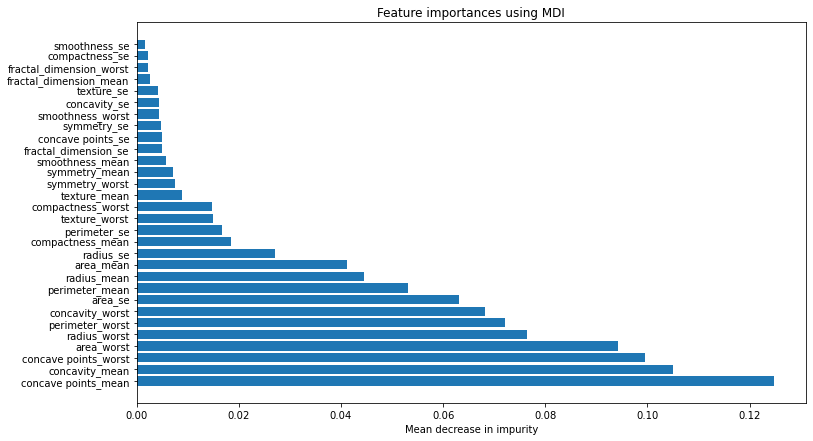

In [59]:
# plota o feature importance
plt.figure(figsize=(12, 7))
plt.title("Feature importances using MDI")
plt.barh(feature_importances_rf.index, feature_importances_rf.values)
plt.xlabel("Mean decrease in impurity");

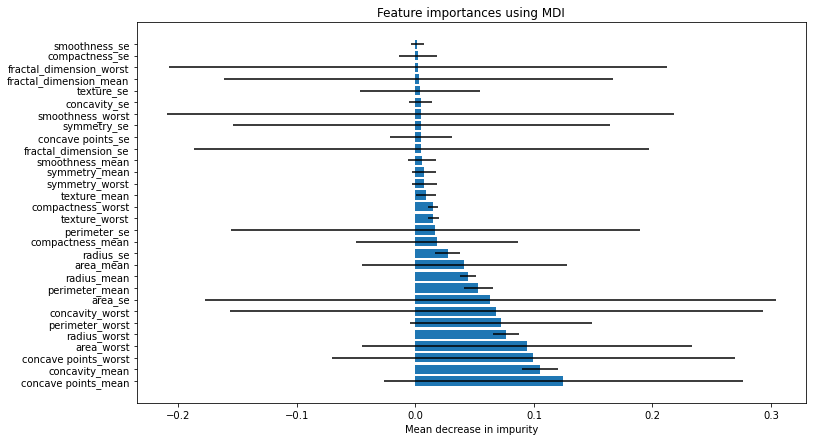

In [60]:
plt.figure(figsize=(12, 7))

plt.title("Feature importances using MDI")

# aqui, mesmo plot, mas com as barras de erro (desvio padrão que calculamos acima)
plt.barh(feature_importances_rf.index, feature_importances_rf.values, xerr=std_fis_rf)

plt.xlabel("Mean decrease in impurity")

plt.show()

<hr>

**Exercício 2.** Aplique o modelo LASSO no dataset `german_credit_data` para selecionar atributos. Utilize a métricas `f1_score` para determinar o valor ideal da força da regularização. Ajuste modelos lineares e depois, um modelo AdaBoost para comparar os resultados.

In [61]:
# leitura do dataset
credit_data = pd.read_csv('../datasets/german_credit_data.csv')

In [62]:
# Verificando dados faltantes, e tipo dos dados
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [63]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [64]:
# separando os dados e preparando preprocessamento
x = credit_data.drop(columns=['Unnamed: 0','Risk'])
y = credit_data['Risk']
y = y.map({'good': 1, 'bad': 0})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y)

cat_features = x.select_dtypes(exclude=np.number).columns.to_list()
num_features = x.select_dtypes(include=np.number).columns.to_list()

pipe_cat = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='None')),
                     ('encoder', OrdinalEncoder())])

preprocessing = ColumnTransformer([('cat_tranform', pipe_cat, cat_features)])


In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# criando o pipeline final para o modelo adaboost

pipe_ada = Pipeline([('preprocessing', preprocessing),
                    ('scaler', StandardScaler()),
                    ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='saga', max_iter=2000))),
                    ('model', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])


In [69]:
from sklearn.metrics import f1_score

param_ada = {'feature_selection__estimator__C': np.random.uniform(0.1, 1, 100),
             'feature_selection__threshold': np.random.uniform(1e-19, 1e-15, 1000),
             'model__base_estimator__max_depth': range(5, x_train.shape[1]+1,1),
             'model__n_estimators': [5,10,20,30,40],
             'model__learning_rate': np.random.uniform(1, 20, 20)}

metric = {'f1': make_scorer(f1_score, pos_label=1)}
search = RandomizedSearchCV(estimator=pipe_ada, param_distributions=param_ada, scoring=metric, cv=kf5, n_jobs=-1, refit='f1', n_iter=100)

In [70]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat_tranform',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='None',
                                                                                                              strategy='constant')),
                                                                                               ('encoder',
                                                                                                OrdinalEncoder())]),
                                                                               ['Sex',
                                                                                

In [71]:
search.best_params_

{'model__n_estimators': 5,
 'model__learning_rate': 8.453907768238693,
 'model__base_estimator__max_depth': 5,
 'feature_selection__threshold': 2.162962085878481e-16,
 'feature_selection__estimator__C': 0.6901552129970121}

In [72]:
search.best_score_

0.8244386391683296